Saving dataset for assignment 2.csv to dataset for assignment 2.csv
User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64
           User ID          Age  App Sessions  Distance Travelled (km)  \
count  5000.000000  5000.000000   5000.000000              5000.000000   
mean   2500.500000    38.423600    124.366400                92.550400   
std    1443.520003    12.160631     42.689317                36.746095   
min       1.000000    18.000000     50.000000                26.000000   
25%    1250.750000    28.000000     89.000000                63.000000   
50%    2500.500000    39.000000    124.000000                89.000000   
75%    3750.250000    49.000000    161.000000               118.000000   
max    5000.000000    59.000000    199.000000               195.000000   

       Calories Burn

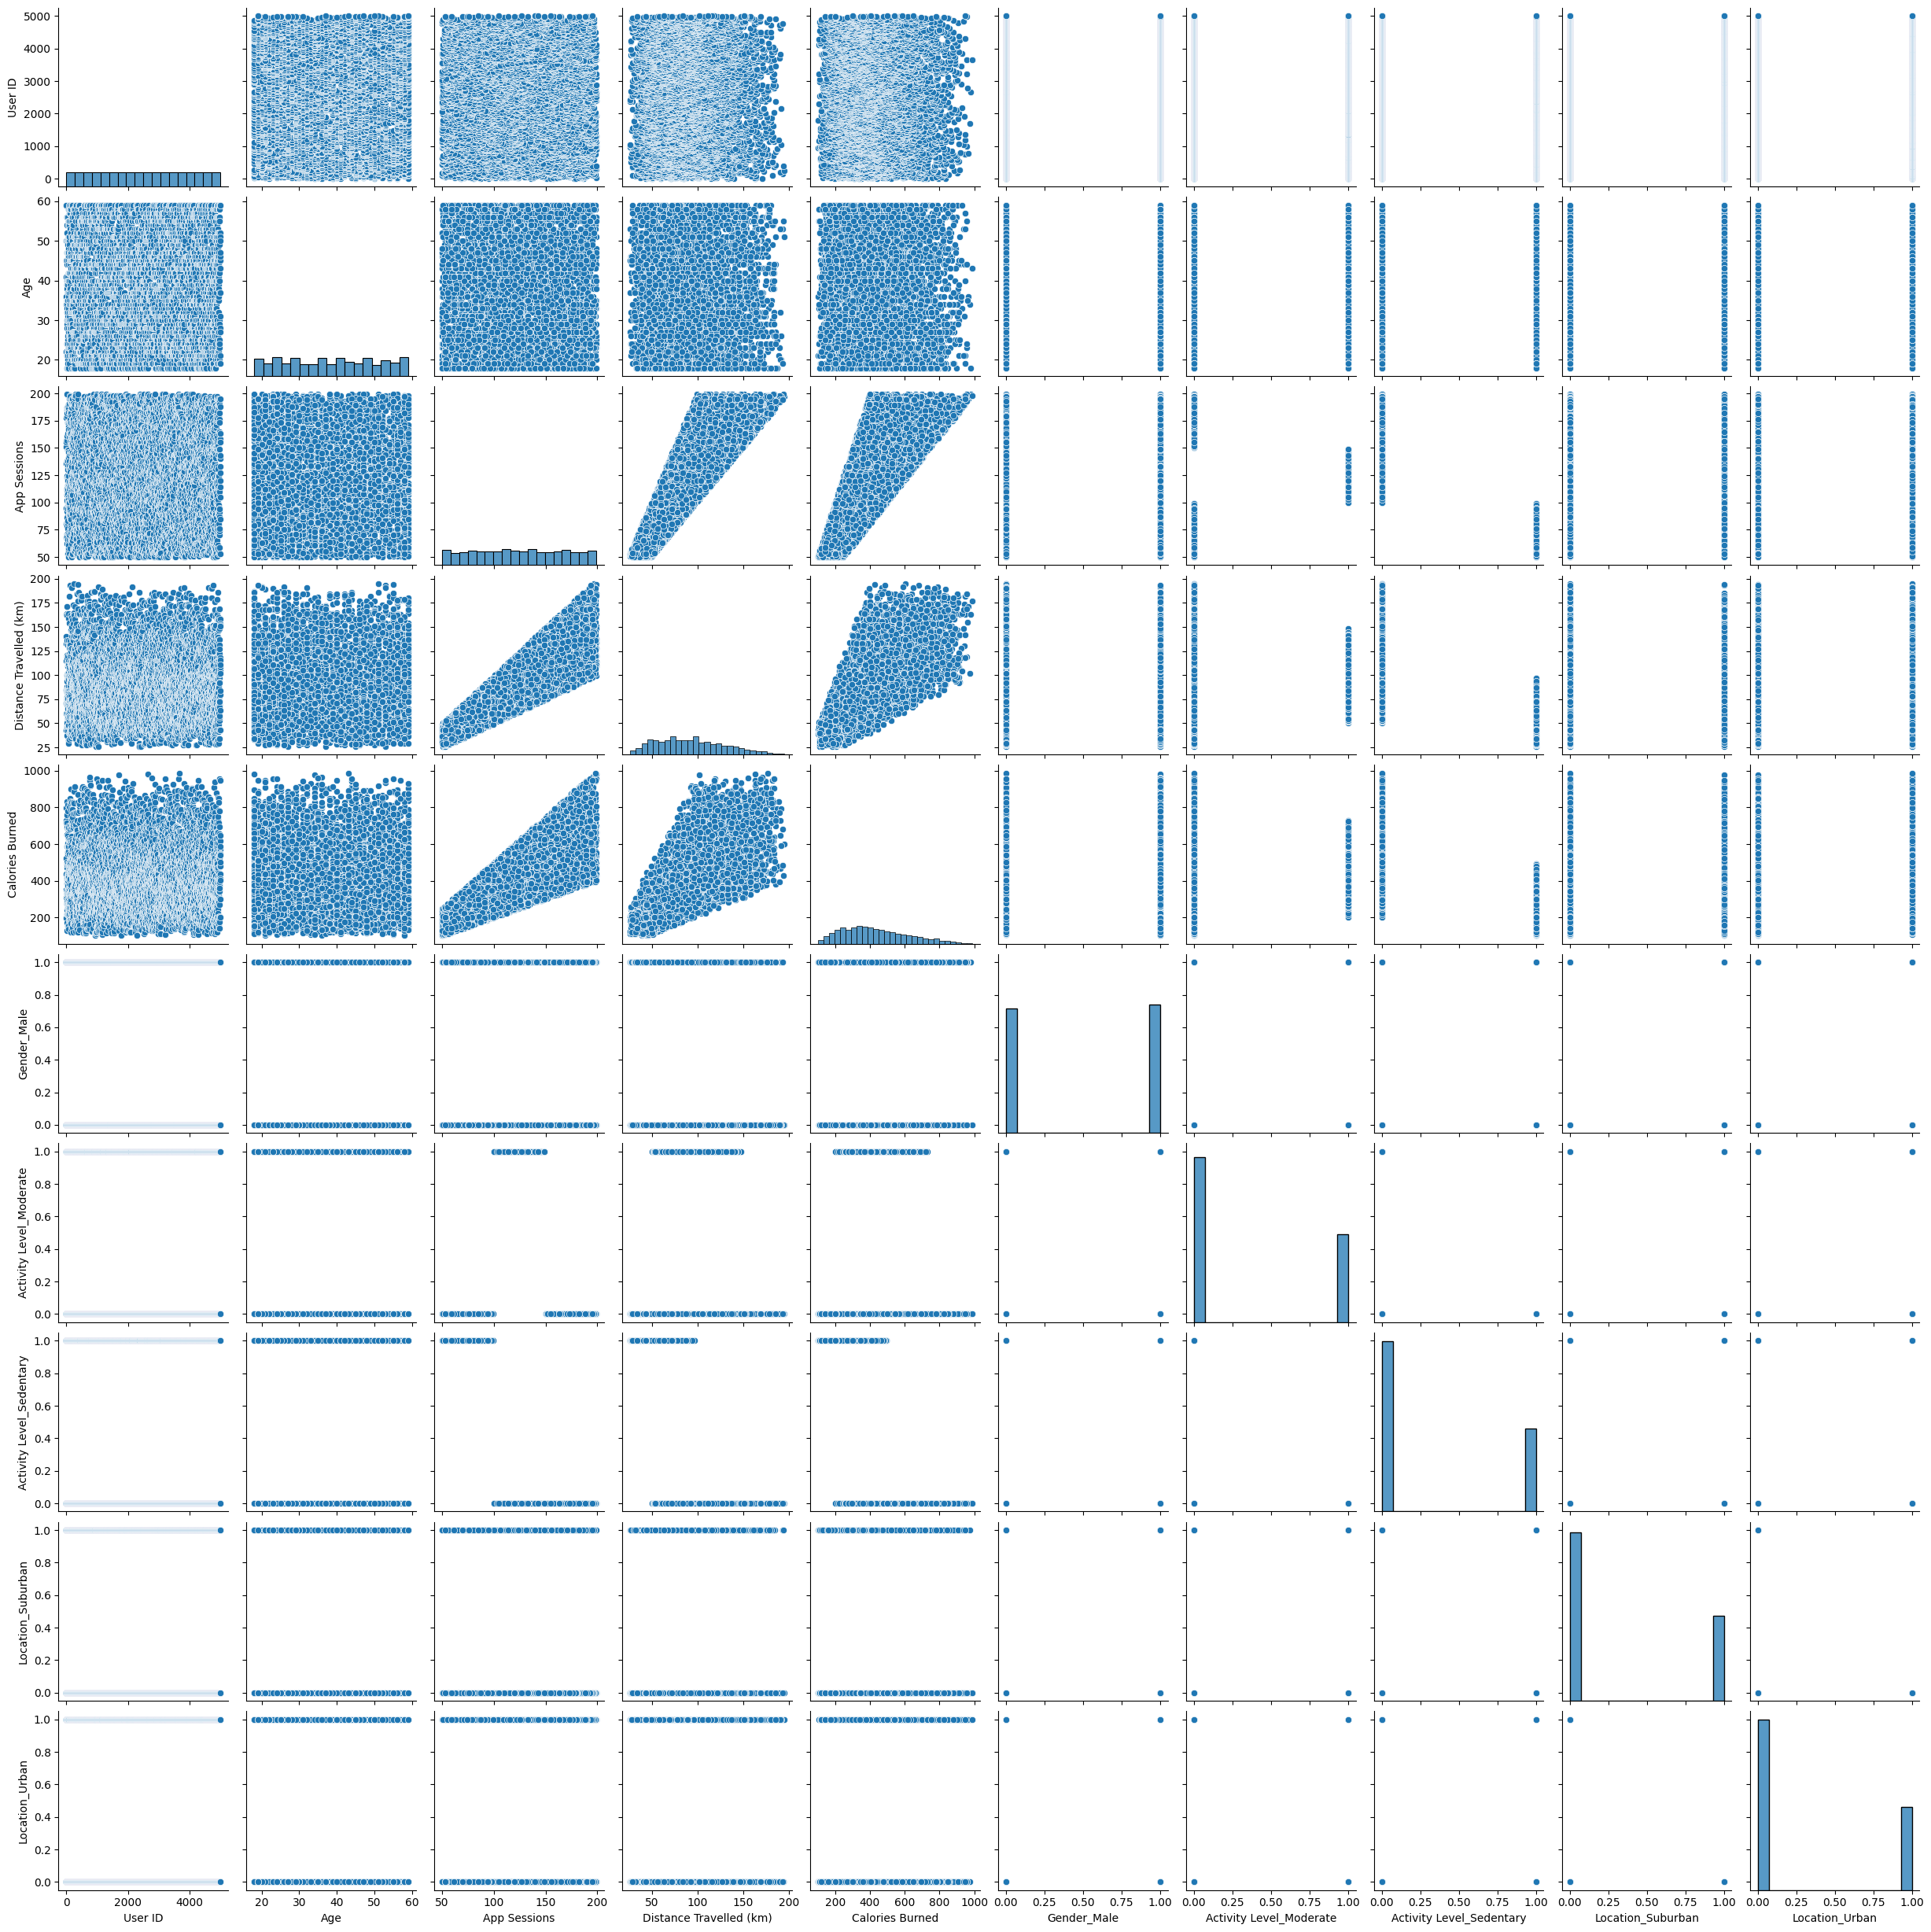

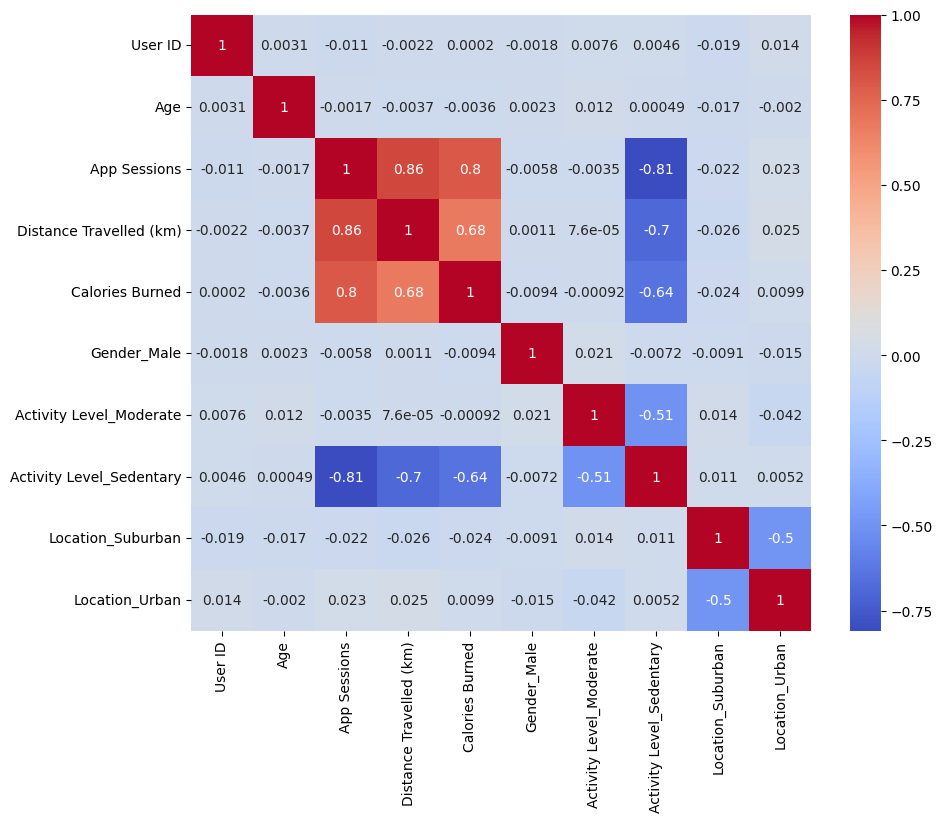

Mean Squared Error: 141.17779422000962
R-squared: 0.9241487608117316


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


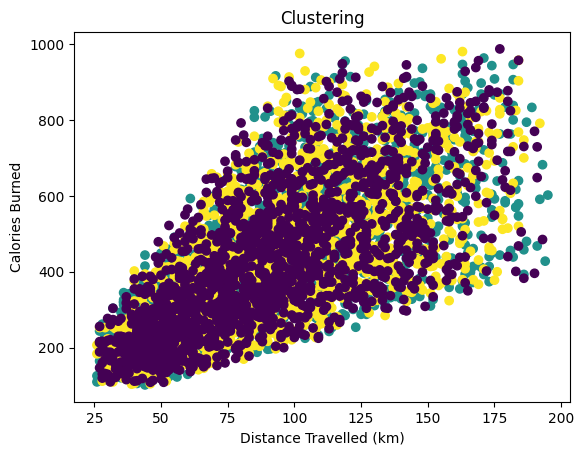

Inertia: 1340523920.9588451

Implications for Software Engineering Decision-Making:
The regression model's Mean Squared Error (MSE) of 141.17779422000962 and R-squared value of 0.9241487608117316 indicate how well the model predicts 'App Sessions' based on the features.
A lower MSE and a higher R-squared value suggest a better fit, helping in understanding the key factors influencing app usage. This insight can guide feature enhancements and targeted interventions to improve user engagement.
The K-Means clustering model groups users based on similar behavior patterns, which can be used to tailor user experiences and marketing strategies for different user segments. The inertia value provides an indication of how tightly the clusters are formed, with a lower value signifying better-defined clusters.


In [1]:

# Code for uploading data
from google.colab import files
uploaded = files.upload()

# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/dataset for assignment 2.csv')
data.head()

# Check for missing values
print(data.isnull().sum())

# Handle missing values (example: filling with mean for numerical columns only)
numerical_columns = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Encode categorical variables
categorical_columns = ['Gender', 'Activity Level', 'Location']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
data.head()

# Summary statistics
print(data.describe())

# Pairplot for visualizing relationships
sns.pairplot(data)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Regression Analysis
X = data.drop('App Sessions', axis=1)
y = data['App Sessions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Clustering (K-Means)
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(data['Distance Travelled (km)'], data['Calories Burned'], c=data['cluster'])
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Calories Burned')
plt.title('Clustering')
plt.show()

# Clustering evaluation (using inertia)
print('Inertia:', kmeans.inertia_)

# Discussion of implications for software engineering decision-making
print("\nImplications for Software Engineering Decision-Making:")
print(f"The regression model's Mean Squared Error (MSE) of {mse} and R-squared value of {r2} indicate how well the model predicts 'App Sessions' based on the features.")
print("A lower MSE and a higher R-squared value suggest a better fit, helping in understanding the key factors influencing app usage. This insight can guide feature enhancements and targeted interventions to improve user engagement.")
print("The K-Means clustering model groups users based on similar behavior patterns, which can be used to tailor user experiences and marketing strategies for different user segments. The inertia value provides an indication of how tightly the clusters are formed, with a lower value signifying better-defined clusters.")
